In [1]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np

In [7]:
ox.features.features_from_address('Prefeitura Municipal de Porto Alegre',dist=2000,tags={'amenity':'hospital'})

addr:housenumber addr:postcode  \
element_type osmid                                       
node         2087827552              651     90040-000   
way          126014194               NaN           NaN   
             233791059                55     90040-341   
             233806011               NaN           NaN   
             244644162               NaN           NaN   
             353491145               910     90035-000   
             442584818               NaN           NaN   
             1066302991              542           NaN   
relation     6232100                 661     90035-052   

                                                               addr:street  \
element_type osmid                                                           
node         2087827552                                Avenida João Pessoa   
way          126014194                                                 NaN   
             233791059                            Rua Jeronimo de Ornellas   
             233806011                                                 NaN   
             244644162                                 Largo Teodoro Herzl   
             353491145                                 Rua Ramiro Barcelos   
             442584818                                                 NaN   
             1066302991  Rua Fernandes Vieira, 542 - Bom Fim, Porto Ale...   
relation     6232100                                 Avenida Independência   

                          amenity healthcare  \
element_type osmid                             
node         2087827552  hospital   hospital   
way          126014194   hospital   hospital   
             233791059   hospital   hospital   
             233806011   hospital   hospital   
             244644162   hospital   hospital   
             353491145   hospital   hospital   
             442584818   hospital   hospital   
             1066302991  hospital   hospital   
relation     6232100     hospital   hospital   

                                                        name  \
element_type osmid                                             
node         2087827552  Policlínica Militar de Porto Alegre   
way          126014194            Santa Casa de Misericórdia   
             233791059                Centro de Saúde Modelo   
             233806011                 Hospital Porto Alegre   
             244644162            Hospital de Pronto Socorro   
             353491145             Hospital Moinhos de Vento   
             442584818      Hospital Beneficência Portuguesa   
             1066302991       Suksteris - Núcleo de Medicina   
relation     6232100              Hospital Presidente Vargas   

                                                     name:en ref:CNES  \
element_type osmid                                                      
node         2087827552  Porto Alegre's Military Policlininc   915742   
way          126014194   Santa Casa de Misericordia Hospital      NaN   
             233791059                                   NaN  2264390   
             233806011                                   NaN      NaN   
             244644162                                   NaN      NaN   
             353491145                                   NaN  3006522   
             442584818                                   NaN      NaN   
             1066302991                                  NaN      NaN   
relation     6232100                                     NaN  2237822   

                                ref:vatin  \
element_type osmid                          
node         2087827552  BR09544774000158   
way          126014194                NaN   
             233791059                NaN   
             233806011                NaN   
             244644162                NaN   
             353491145   BR92685833000151   
             442584818                NaN   
             1066302991               NaN   
relation     6232100                  

In [5]:
ox.features.features_from_place('Porto Alegre',dist=500,tags={'amenity':'hospital'})

TypeError: features_from_place() got an unexpected keyword argument 'dist'

In [5]:
#creating our network dataset
rede = ox.graph.graph_from_address('Porto Alegre',dist=1000,network_type='walk',
simplify=True)

In [6]:
#plotting the inspections
#fig, ax = ox.plot_graph(rede, node_color='#aaaaaa', node_size=0, show=False, close=True)
#ax.scatter(x=cluster['long'], y=cluster['lat'], c='red', marker='.', s=50, zorder=3)
#fig.canvas.draw()
#fig

In [7]:
#creating a networkX dateset 
G_dm = nx.DiGraph(rede)

In [8]:
#testing a cluster
cluster = nodes.loc[nodes['labels']==2].reset_index(drop=True)
cluster = cluster[['lat','long','key','credits']]
cluster

,lat,long,key,credits
0,-23.555680,-46.590015,key,688.0
1,-23.575109,-46.633750,None,699.0
2,-23.589230,-46.672630,None,509.0
3,-23.564737,-46.686574,None,130.0
4,-23.594962,-46.666207,None,486.0
5,-23.561794,-46.675166,None,434.0
6,-23.565554,-46.747721,key_location,NaN


In [9]:
cluster['credits'].mean()

491.0

In [10]:
#discovering the nearest nodes
cluster['nodes'] = ox.nearest_nodes(G_dm, X=cluster['long'], Y=cluster['lat'])

In [11]:
from itertools import permutations,combinations

#perm = permutations([0,1,2,3,4,5,6,7,8,9,10,11]) 
#lista_possibilidades = list(perm)
#len(lista_possibilidades)

In [12]:
#len(list(permutations(range(40),4)))

In [13]:
lista_possibilidades_3v = list(combinations(range(7),3))
len(lista_possibilidades_3v)


35

In [14]:
lista_possibilidades_4v = list(combinations(range(7),4))
len(lista_possibilidades_4v)


35

In [15]:
#lista_possibilidades_5v = list(combinations(range(6),5))
#len(lista_possibilidades_5v)

In [16]:
lista_possibilidades = lista_possibilidades_3v + lista_possibilidades_4v
lista_possibilidades

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 4, 5),
 (0, 4, 6),
 (0, 5, 6),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 4, 5),
 (1, 4, 6),
 (1, 5, 6),
 (2, 3, 4),
 (2, 3, 5),
 (2, 3, 6),
 (2, 4, 5),
 (2, 4, 6),
 (2, 5, 6),
 (3, 4, 5),
 (3, 4, 6),
 (3, 5, 6),
 (4, 5, 6),
 (0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 5, 6),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 5, 6),
 (0, 3, 4, 5),
 (0, 3, 4, 6),
 (0, 3, 5, 6),
 (0, 4, 5, 6),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 3, 6),
 (1, 2, 4, 5),
 (1, 2, 4, 6),
 (1, 2, 5, 6),
 (1, 3, 4, 5),
 (1, 3, 4, 6),
 (1, 3, 5, 6),
 (1, 4, 5, 6),
 (2, 3, 4, 5),
 (2, 3, 4, 6),
 (2, 3, 5, 6),
 (2, 4, 5, 6),
 (3, 4, 5, 6)]

In [17]:
route_combination = list(combinations(lista_possibilidades,2))

In [18]:
len(route_combination)

2415

In [19]:
comb = []
for x in route_combination:
    check = any(item in x[0] for item in x[1])
    if check:
        pass
    else:
        #print(x)
        comb.append(x)

In [20]:
len(comb)

105

In [21]:
lista = cluster.index.to_list()
lista

[0, 1, 2, 3, 4, 5, 6]

In [22]:
completa = []
for x in comb:
    check = all(item in x[0]+x[1] for item in lista )
    if check:
        completa.append([x[0],x[1]])

In [23]:
len(completa)

35

In [24]:
key_filter = []
for i in range(len(completa)):
    if (0 in completa[i][0] and 6 in completa[i][0]) or (0 in completa[i][1] and 6 in completa[i][1]):
        
        key_filter.append(completa[i])

key_filter

[[(0, 1, 6), (2, 3, 4, 5)],
 [(0, 2, 6), (1, 3, 4, 5)],
 [(0, 3, 6), (1, 2, 4, 5)],
 [(0, 4, 6), (1, 2, 3, 5)],
 [(0, 5, 6), (1, 2, 3, 4)],
 [(1, 2, 3), (0, 4, 5, 6)],
 [(1, 2, 4), (0, 3, 5, 6)],
 [(1, 2, 5), (0, 3, 4, 6)],
 [(1, 3, 4), (0, 2, 5, 6)],
 [(1, 3, 5), (0, 2, 4, 6)],
 [(1, 4, 5), (0, 2, 3, 6)],
 [(2, 3, 4), (0, 1, 5, 6)],
 [(2, 3, 5), (0, 1, 4, 6)],
 [(2, 4, 5), (0, 1, 3, 6)],
 [(3, 4, 5), (0, 1, 2, 6)]]

In [25]:
len(key_filter)

15

In [26]:
cluster.loc[cluster.index.isin(key_filter[0][0])]['credits'].sum()

1387.0

In [27]:
def condicao(conjunto,min,max):
    condition_1 = cluster.loc[cluster.index.isin(conjunto)]['credits'].sum() > min
    condition_2 = cluster.loc[cluster.index.isin(conjunto)]['credits'].sum() < max

    return (condition_1) and (condition_2)



In [28]:
min_credits = 500
max_credits = 1300
possibilidades_reais = []
for i in range(len(key_filter)):

    if condicao(key_filter[i][0],min_credits,max_credits) and condicao(key_filter[i][1],min_credits,max_credits):
        possibilidades_reais.append(key_filter[i])

In [29]:
def possiveis_distancias(indice):
    if len(indice) == 3:
        d1 = nx.dijkstra_path_length(rede, source=cluster['nodes'][0], target=cluster['nodes'][indice[1]], weight='length')
        d2 = nx.dijkstra_path_length(rede, source=cluster['nodes'][indice[1]], target=cluster['nodes'][indice[2]], weight='length') 
        #d3 = nx.dijkstra_path_length(rede, source=cluster['nodes'][indice[2]], target=cluster['nodes'][indice[3]], weight='length')
        #print(d1+d2)
        distancia = (d1+d2)

    elif len(indice) == 4:
        d1 = nx.dijkstra_path_length(rede, source=cluster['nodes'][0], target=cluster['nodes'][indice[1]], weight='length')
        d2 = nx.dijkstra_path_length(rede, source=cluster['nodes'][indice[1]], target=cluster['nodes'][indice[2]], weight='length') 
        d3 = nx.dijkstra_path_length(rede, source=cluster['nodes'][indice[2]], target=cluster['nodes'][indice[3]], weight='length')
        #print(d1+d2+d3)
        distancia = (d1+d2+d3)

    elif len(indice) == 5:
        d1 = nx.dijkstra_path_length(rede, source=cluster['nodes'][0], target=cluster['nodes'][indice[1]], weight='length')
        d2 = nx.dijkstra_path_length(rede, source=cluster['nodes'][indice[1]], target=cluster['nodes'][indice[2]], weight='length') 
        d3 = nx.dijkstra_path_length(rede, source=cluster['nodes'][indice[2]], target=cluster['nodes'][indice[3]], weight='length')
        d4 = nx.dijkstra_path_length(rede, source=cluster['nodes'][indice[3]], target=cluster['nodes'][indice[4]], weight='length')
        #print(d1+d2+d3+d4)
        distancia = (d1+d2+d3+d4)

    elif len(indice) == 6:
        d1 = nx.dijkstra_path_length(rede, source=cluster['nodes'][0], target=cluster['nodes'][indice[1]], weight='length')
        d2 = nx.dijkstra_path_length(rede, source=cluster['nodes'][indice[1]], target=cluster['nodes'][indice[2]], weight='length') 
        d3 = nx.dijkstra_path_length(rede, source=cluster['nodes'][indice[2]], target=cluster['nodes'][indice[3]], weight='length')
        d4 = nx.dijkstra_path_length(rede, source=cluster['nodes'][indice[3]], target=cluster['nodes'][indice[4]], weight='length')
        d5 = nx.dijkstra_path_length(rede, source=cluster['nodes'][indice[4]], target=cluster['nodes'][indice[5]], weight='length')
        #print(d1+d2+d3+d4+d5)
        distancia = (d1+d2+d3+d4+d5)

    return distancia

def possiveis_caminhos(indice):
    caminho = ox.shortest_path(rede, cluster['nodes'][0], cluster['nodes'][indice[0]])
    caminho1 = ox.shortest_path(rede, cluster['nodes'][indice[0]], cluster['nodes'][indice[1]])
    caminho2 = ox.shortest_path(rede, cluster['nodes'][indice[1]], cluster['nodes'][indice[2]])
    lista = [caminho,caminho1,caminho2]
    return lista

In [30]:
lista_distancias = []
for conjunto in possibilidades_reais:
    lista_distancias.append(possiveis_distancias(conjunto[0]) + possiveis_distancias(conjunto[1]))

lista_distancias

[]

In [31]:
#IDEIA ANTIGA
possibilidades_reais = []
threshold_min_credits = 0
threshold_max_credits = 10*cluster['credits'].mean()
def condicao(imovel,chave,conjunto):


    if imovel in conjunto and chave in conjunto:
            
        condition_2 = conjunto.index(chave) > conjunto.index(imovel)
        condition_3 = cluster.loc[cluster.index.isin(conjunto)]['credits'].sum() > threshold_min_credits
        condition_4 = cluster.loc[cluster.index.isin(conjunto)]['credits'].sum() < threshold_max_credits

        if (condition_2) and (condition_3) and (condition_4):
            possibilidades_reais.append(conjunto)
    
    elif imovel not in conjunto and chave not in conjunto:

        condition_3 = cluster.loc[cluster.index.isin(conjunto)]['credits'].sum() > threshold_min_credits
        condition_4 = cluster.loc[cluster.index.isin(conjunto)]['credits'].sum() < threshold_max_credits

        if (condition_3) and (condition_4):
            possibilidades_reais.append(conjunto)
        

In [32]:
for tupla in lista_possibilidades:
    condicao(11,10,tupla)
len(possibilidades_reais)

70

In [33]:
combinacoes = list(combinations(possibilidades_reais,2))
len(combinacoes)

2415

In [34]:
len(comb)

105

In [35]:
comb

[((0, 1, 2), (3, 4, 5)),
 ((0, 1, 2), (3, 4, 6)),
 ((0, 1, 2), (3, 5, 6)),
 ((0, 1, 2), (4, 5, 6)),
 ((0, 1, 2), (3, 4, 5, 6)),
 ((0, 1, 3), (2, 4, 5)),
 ((0, 1, 3), (2, 4, 6)),
 ((0, 1, 3), (2, 5, 6)),
 ((0, 1, 3), (4, 5, 6)),
 ((0, 1, 3), (2, 4, 5, 6)),
 ((0, 1, 4), (2, 3, 5)),
 ((0, 1, 4), (2, 3, 6)),
 ((0, 1, 4), (2, 5, 6)),
 ((0, 1, 4), (3, 5, 6)),
 ((0, 1, 4), (2, 3, 5, 6)),
 ((0, 1, 5), (2, 3, 4)),
 ((0, 1, 5), (2, 3, 6)),
 ((0, 1, 5), (2, 4, 6)),
 ((0, 1, 5), (3, 4, 6)),
 ((0, 1, 5), (2, 3, 4, 6)),
 ((0, 1, 6), (2, 3, 4)),
 ((0, 1, 6), (2, 3, 5)),
 ((0, 1, 6), (2, 4, 5)),
 ((0, 1, 6), (3, 4, 5)),
 ((0, 1, 6), (2, 3, 4, 5)),
 ((0, 2, 3), (1, 4, 5)),
 ((0, 2, 3), (1, 4, 6)),
 ((0, 2, 3), (1, 5, 6)),
 ((0, 2, 3), (4, 5, 6)),
 ((0, 2, 3), (1, 4, 5, 6)),
 ((0, 2, 4), (1, 3, 5)),
 ((0, 2, 4), (1, 3, 6)),
 ((0, 2, 4), (1, 5, 6)),
 ((0, 2, 4), (3, 5, 6)),
 ((0, 2, 4), (1, 3, 5, 6)),
 ((0, 2, 5), (1, 3, 4)),
 ((0, 2, 5), (1, 3, 6)),
 ((0, 2, 5), (1, 4, 6)),
 ((0, 2, 5), (3, 4, 6)),
 ((0

In [36]:
min(lista_distancias)

ValueError: min() arg is an empty sequence

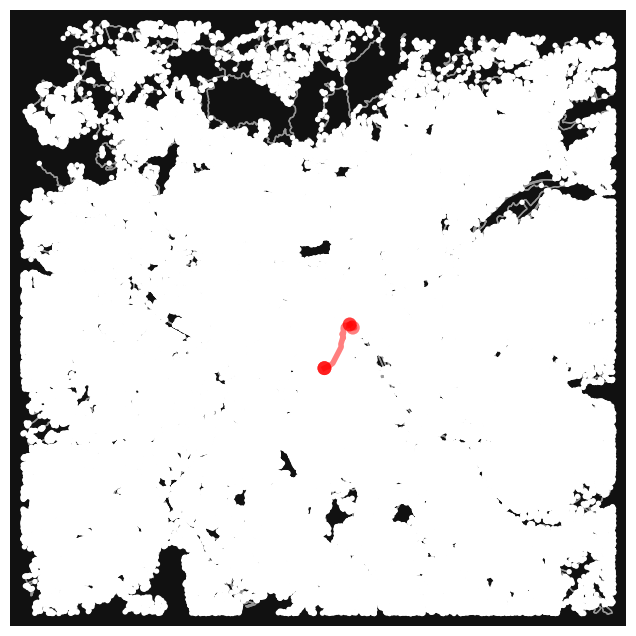

KeyboardInterrupt: 

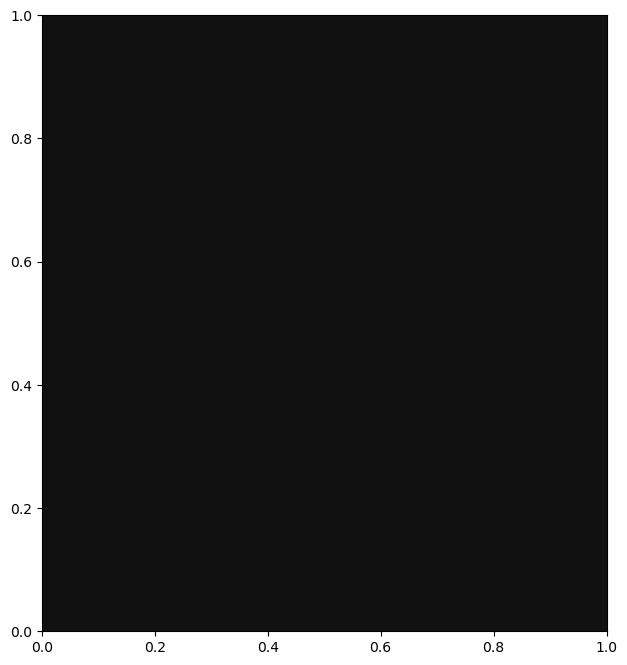

In [ ]:
for x in comb[1]:
    fig, ax = ox.plot_graph_routes(rede,possiveis_caminhos(x))

In [ ]:

for conjunto in possibilidades_reais:
    print(conjunto)
    possiveis_distancias(conjunto)
    fig, ax = ox.plot_graph_routes(rede,possiveis_caminhos(conjunto))

In [ ]:
nodes[['lat','long']].to_csv('nodes.csv')